In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/MyDrive/DataFiles"

Mounted at /content/drive
CustomerChurn  CustomerPredictionTrain


## Data Reading

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataFiles/CustomerChurn/Telco-Churn-train.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
# visulize the columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# checking data types of columns
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [ ]:
# check the unique value of each columns

for col in df.columns:
  print(f"Column: {col} --- UniqueValues: {df[col].unique()}")

Column: customerID --- UniqueValues: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender --- UniqueValues: ['Female' 'Male']
Column: SeniorCitizen --- UniqueValues: [0 1]
Column: Partner --- UniqueValues: ['Yes' 'No']
Column: Dependents --- UniqueValues: ['No' 'Yes']
Column: tenure --- UniqueValues: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService --- UniqueValues: ['No' 'Yes']
Column: MultipleLines --- UniqueValues: ['No phone service' 'No' 'Yes']
Column: InternetService --- UniqueValues: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity --- UniqueValues: ['No' 'Yes' 'No internet service']
Column: OnlineBackup --- UniqueValues: ['Yes' 'No' 'No internet service']
Column: DeviceProtection --- UniqueValues: ['No' 'Yes' 'No internet service']
Column

In [ ]:
# checking the float and int datatypes columns
df.select_dtypes("float64").dtypes

MonthlyCharges    float64
dtype: object

## Exploaratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking the total charges columns as it is mentioned as object type
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [ ]:
# transform the column TotalCharges into numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# null observation of the Total charges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


These observation have tenure is 0 and monthly charges as non -zero.Therefore we remove these datapoints from dataset.

In [ ]:
# dropping the null values
df.dropna(inplace=True)

In [ ]:
print("Dataset shape after dropping the null values--", df.shape)

Dataset shape after dropping the null values-- (7032, 21)


In [ ]:
# removing the customer ID column
df.drop(columns=['customerID'], axis=1, inplace=True)

In [ ]:
print("Dataset shape after dropping the customerId --", df.shape)

Dataset shape after dropping the customerId -- (7032, 20)


In [ ]:
# unique values of the payment columnn
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# removing the (automatic) from the payment methods names
df['PaymentMethod'] = df['PaymentMethod'].str.replace( "(automatic)","", regex=False)

In [ ]:
# checking the unique values of payment method column
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

## Data Visualization

In [ ]:
df['Churn'].value_counts(normalize=True)*100
#this is an unbalanced dataset

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

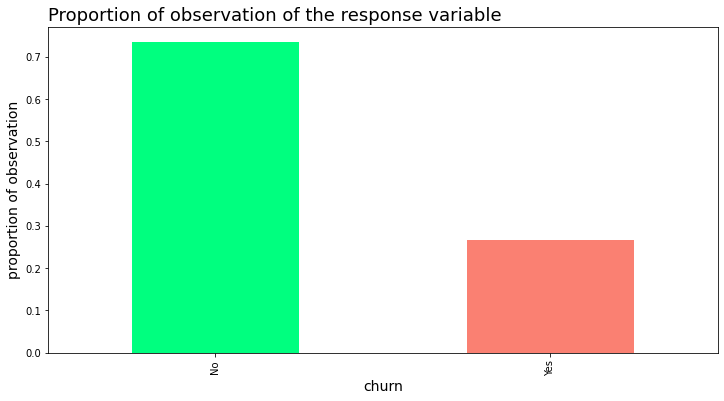

In [ ]:
# creating a figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

#create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', ax=ax, color=['springgreen', 'salmon'])

#set title and labels
ax.set_title('Proportion of observation of the response variable',
             fontsize=18, loc='left')

ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('proportion of observation', fontsize=14)
plt.show()

Now we will analyze the influence of each categorical variable on the outcome

In [ ]:
def percen_stacked_plot(columns, super_title):
  """
  columns: list of columns
  super_title: title of the visualization
  """
  number_of_columns=2
  number_of_rows = len(columns)//2 +1

  # create a figure
  fig = plt.figure(figsize=(12, 5*number_of_rows))
  fig.suptitle(super_title,fontsize=22)

  # loop to each column to create a subplot
  for index, column in enumerate(columns,1):

    #create a subplot
    ax = fig.add_subplot(number_of_rows,number_of_columns,index)

    # creating a pivot table with percentages
    prop_by_ind = pd.crosstab(df[column],df['Churn']).apply(lambda x: x/x.sum()*100,axis=1)

    prop_by_ind.plot(kind='bar',ax=ax,stacked=True,color=['springgreen','salmon'],
                     rot=0)

    # set the legend in the upper right corner
    ax.legend(loc='upper right',bbox_to_anchor=(0.6,0.5,0.5,0.5),
              title='Churn',fancybox=True)
    
    #set title and labels
    ax.set_title("Proportion of observation by "+ column, fontsize=16, loc='left')

    #eliminate the frame from the plot
    spine_names = ['top','right', 'bottom','left']

    for sp in spine_names:
      ax.spines[sp].set_visible(False)







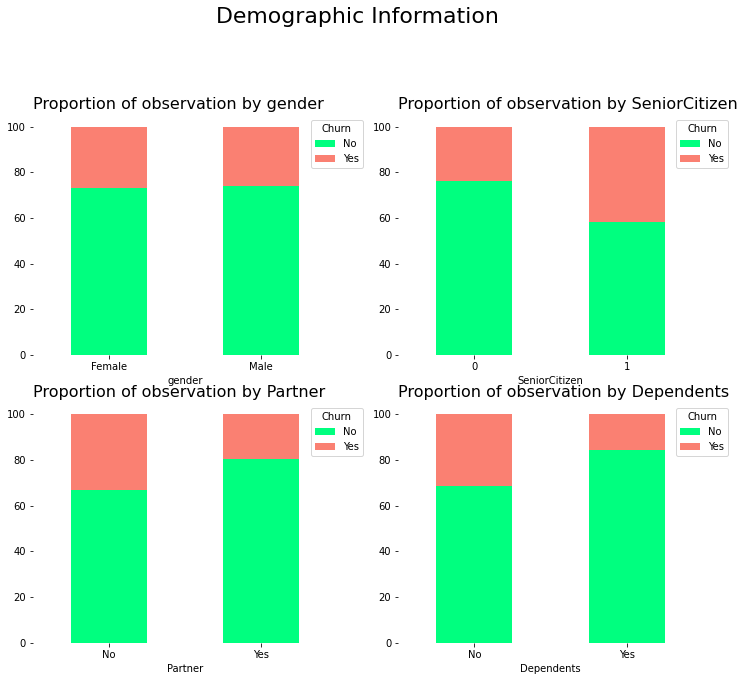

In [ ]:
# demographic column names
demo_columns = ['gender','SeniorCitizen', 'Partner','Dependents']

#stacked bar plot of the demographic columns
percen_stacked_plot(demo_columns, 'Demographic Information')

Observations:  
1)The churn rate of senior citizens is high as compared to young.  
2)Gender does not play significant role in churn rate.  
3)Customer with partners churn less. 

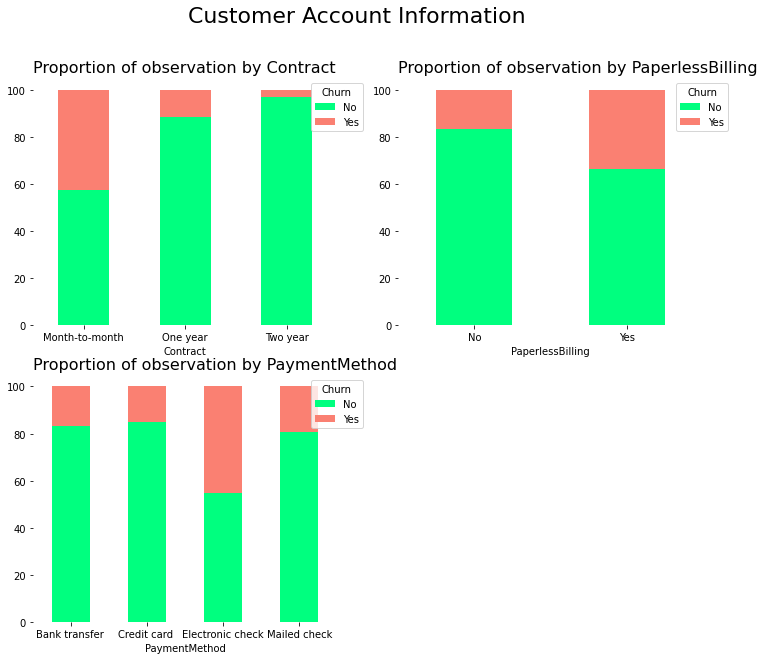

In [ ]:
# customer account columns
acc_columns = ['Contract', 'PaperlessBilling', "PaymentMethod"]

# stacked plot of customer account columns
percen_stacked_plot(acc_columns,"Customer Account Information")

Observation:  
1)Customers with month-to-month contract have higher churn rates.  
2)Customers who opted for an electronic check are more likely to churn.  
3)Customers subscirbed to paperless billing churn more than those who are not subscribed.  

In [ ]:
def histogram(columns,super_title):
  number_of_columns=2
  number_of_rows=len(columns)//2+1

  # create a figure
  fig = plt.figure(figsize=(12,5*number_of_rows))
  fig.suptitle(super_title,fontsize=22,)

  #loop to each column name to create a subplot
  for index, column in enumerate(columns,1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows,number_of_columns,index)

    # histogram for each class (normalized histogram)
    df[df['Churn']=='No'][column].plot(kind='hist',ax=ax,density=True,
                                        alpha=0.5,color='springgreen',label='No')
    
    df[df['Churn']=='Yes'][column].plot(kind='hist',ax=ax,density=True,
                                        alpha=0.5,color='salmon',label='No')
    
    # set the legend in the upper right corner
    ax.legend(loc='upper right', bbox_to_anchor=(0.5,0.5,0.5,0.5),
              title="Churn", fancybox=True)
    
    ax.set_title("Distributed of "+column+ " by churn",
                 fontsize=16,loc='left')
    
    ax.tick_params(rotation='auto')

    #eliminate the frame from the plot
    spine_names=['top','right','bottom','left']

    for sp in spine_names:
      ax.spines[sp].set_visible(False)


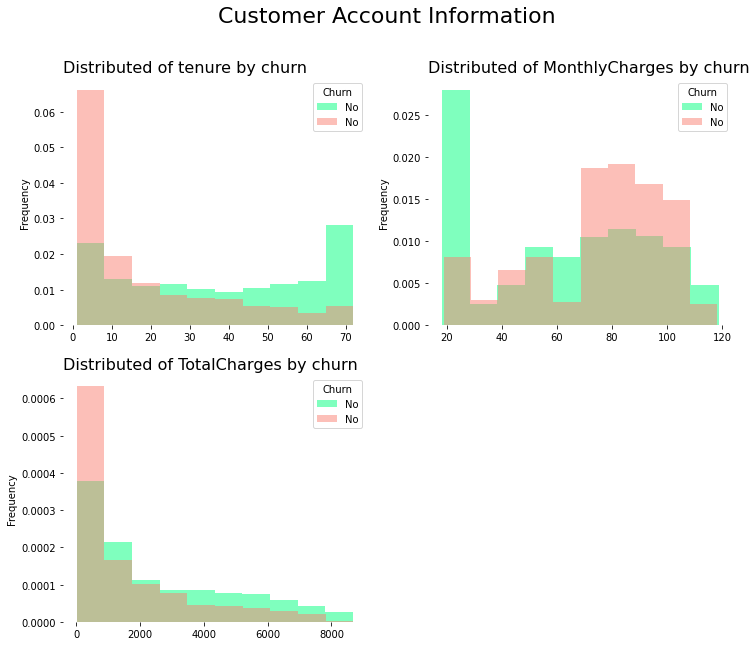

In [ ]:
# customer account columns
acc_columns=['tenure','MonthlyCharges','TotalCharges']
histogram(acc_columns, 'Customer Account Information')

Observation:  
1) The churn rate tends to be larger when monthly charges are high.  
2) New customers(low tenure) are more likely to to churn.  
3) Clients with high total charges are less likely to leave the company.

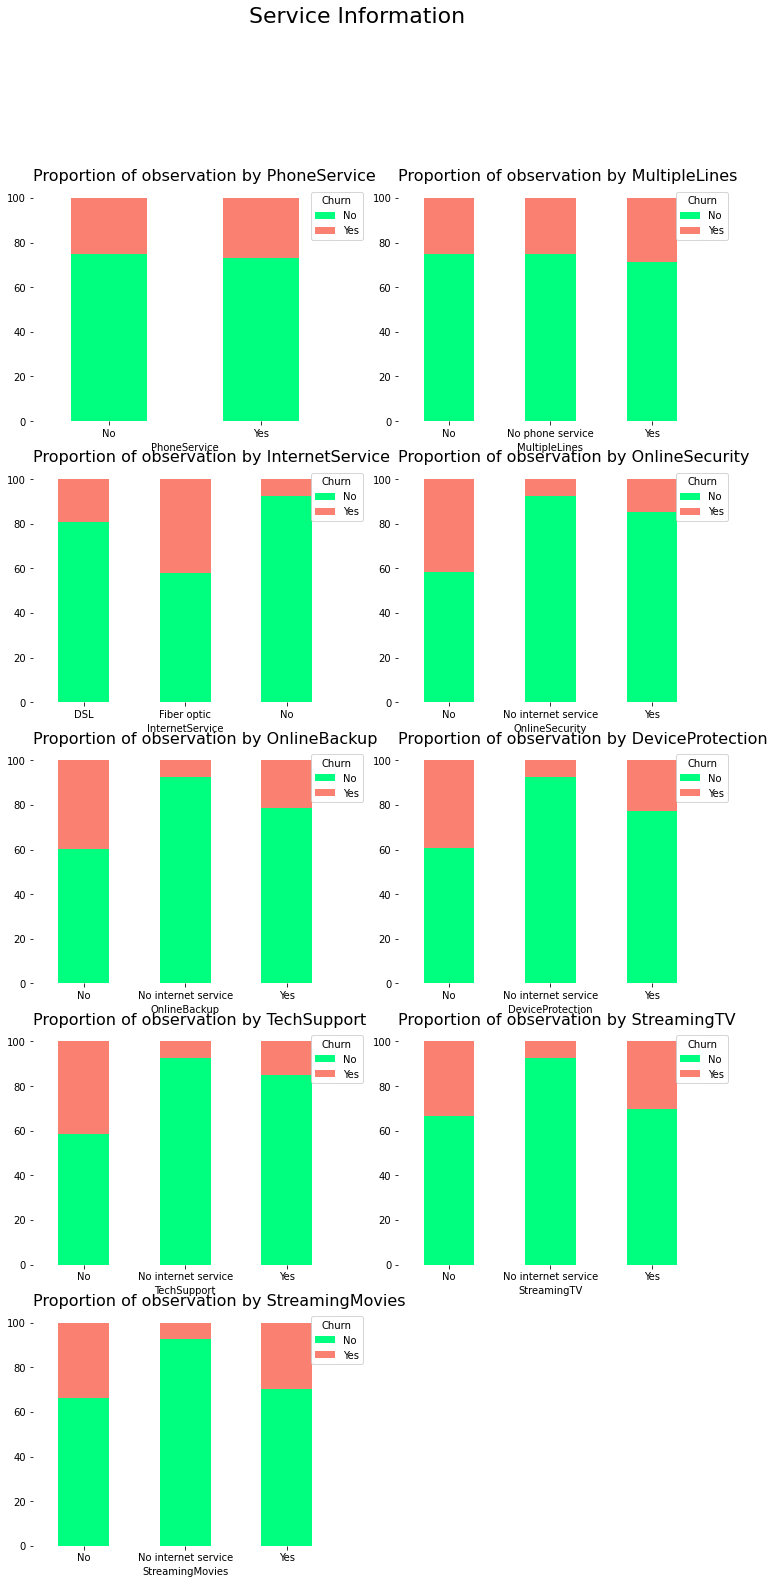

In [ ]:
# service columns names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV',
                    'StreamingMovies']

# stacked plot for service columns
percen_stacked_plot(services_columns, 'Service Information')

## Feature Importance


In [ ]:
# function for computing the mutual information score between categorical variable 
# and the response variable

from sklearn.metrics import mutual_info_score

def compute_mutual_info(cat_columns):
  return mutual_info_score(cat_columns,df['Churn'])

cat_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

feature_importance = cat_variables.apply(compute_mutual_info).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


## Feature Engineering

In [ ]:
df_tr = df.copy()

In [ ]:
# Senior Citizen column is already a binary column and no need to modified

# Label Encoding
df_copy = df.copy()

# label encoding columns 
label_end_cols = ['gender','Partner', 'Dependents', 'PaperlessBilling',
                  'PhoneService', 'Churn']

for col in label_end_cols:
  if col == 'gender':
    df_copy[col] = df_copy[col].map({
        'Female':1, 'Male':0
    })
  else:
    df_copy[col] = df_copy[col].map({'Yes':1, 'No':0})

In [ ]:
df_copy[label_end_cols].head()

,gender,Partner,Dependents,PaperlessBilling,PhoneService,Churn
0,1,1,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,1,0,0,1,1,1


In [ ]:
# one hot encoding (categorical variable with more than two unique values)
df.select_dtypes(include='object').nunique() >2

gender              False
Partner             False
Dependents          False
PhoneService        False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling    False
PaymentMethod        True
Churn               False
dtype: bool

In [ ]:
one_hot_cols = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                "Contract","PaymentMethod"]

In [ ]:
df_copy = pd.get_dummies(df_copy, columns=one_hot_cols)

In [ ]:
df_copy.shape

(7032, 41)

In [ ]:
# normalizing the numerical variables
df.select_dtypes(include=['float64','int64']).dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [ ]:
num_variables=['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_copy[num_variables]=scaler.fit_transform(df_copy[num_variables])


In [ ]:
df_copy[num_variables].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


## Splitting training and testing dataset

In [ ]:
# select the dependent variable
y = df_copy.loc[:,'Churn']
X = df_copy.drop(columns="Churn")

print(X.columns)

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer ',
       'PaymentMethod_Credit card ', 'Pa

In [ ]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                  random_state=101, shuffle=True)

In [ ]:
print('Shape of the training features-------',X_train.shape)
print('Shape of the training label----------',y_train.shape)
print('Shape of the testing features--------',X_test.shape)
print('Shape of the training label----------',y_test.shape)

Shape of the training features------- (4922, 40)
Shape of the training label---------- (4922,)
Shape of the testing features-------- (2110, 40)
Shape of the training label---------- (2110,)


## Testing Algorithms

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def create_models(seed=101):
  models = []
  models.append(('dummy_classifier', DummyClassifier(random_state=seed,
                                                     strategy='most_frequent')))
  models.append(('k_nearest_neighbors', KNeighborsClassifier()))
  models.append(('logistic_regression', LogisticRegression(random_state=seed)))
  models.append(('support_vector_machines', SVC(random_state=seed)))
  models.append(('random_forest', RandomForestClassifier(random_state=seed)))
  models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

  return models

# create a list with all the algorithms we are going to assess
models=create_models()

In [ ]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test,predictions)
  results.append(accuracy)
  names.append(name)
  print(f"Classifier-- {name} , ----------- Accuracy--{round(accuracy,5)*100}")

Classifier-- dummy_classifier , ----------- Accuracy--74.882
Classifier-- k_nearest_neighbors , ----------- Accuracy--76.398
Classifier-- logistic_regression , ----------- Accuracy--80.758
Classifier-- support_vector_machines , ----------- Accuracy--80.711
Classifier-- random_forest , ----------- Accuracy--79.10000000000001
Classifier-- gradient_boosting , ----------- Accuracy--80.853


## Hyper Parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid_parameters = {
    'n_estimators':[80,90,100,110,115,120],
    'max_depth':[3,4,5,6],
    'max_features':[None,'auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=grid_parameters,
    cv=5,
    n_iter=150,
    n_jobs=-1
)

# fittin the model for random search
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [ ]:
# best parameters after tuning
print(random_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 3}


In [ ]:
best_model=random_search.best_estimator_

In [ ]:
best_predictions = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# construct the confusion matrix
print(classification_report(y_test,best_predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
confusion_matrix = confusion_matrix(y_test, best_predictions)

In [ ]:
confusion_matrix

array([[1431,  149],
       [ 253,  277]])

In [ ]:
accuracy_score(y_test,best_predictions)

0.809478672985782

### Pickling the models

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
label_end_cols

['gender',
 'Partner',
 'Dependents',
 'PaperlessBilling',
 'PhoneService',
 'Churn']

In [ ]:
one_hot_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [ ]:
num_variables

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df_tr = df.copy()

In [ ]:
pickle.dump(label,open('labelEncoder.pkl','wb'))

In [ ]:
scaler = MinMaxScaler()
df_tr[num_variables]=scaler.fit_transform(df_tr[num_variables])

In [ ]:
pickle.dump(scaler,open("Scaler.pkl","wb"))

In [ ]:
pickle.dump(best_model,open("BestModel.pkl","wb"))

In [96]:
pickle.dump(num_variables,open("ScalingVar.pkl","wb"))
pickle.dump(label_end_cols[:-1],open("LabelVar.pkl","wb"))
pickle.dump(one_hot_cols,open("OneHotVar.pkl","wb"))